In [5]:
import pandas 

In [6]:
import pandas as pd

In [7]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

In [8]:
attendance_CAcounties = pandas.read_csv('attendance_rates.csv')

In [9]:
attendance_CAcounties.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
0,0,0,0,0,0,0,0,0,0,0,...,NaN,Alameda,NaN,NaN,All,GF,114224,112861,16501,14.6
1,1,1,1,1,1,1,1,1,1,1,...,NaN,Alameda,NaN,NaN,No,GF,102681,101285,15082,14.9
2,2,2,2,2,2,2,2,2,2,2,...,NaN,Alameda,NaN,NaN,Yes,GF,12096,11850,1530,12.9
3,3,3,3,3,3,3,3,3,3,3,...,NaN,Alameda,NaN,NaN,All,GM,121852,120048,18167,15.1
4,4,4,4,4,4,4,4,4,4,4,...,NaN,Alameda,NaN,NaN,No,GM,110192,108370,16793,15.5


In [10]:
type(attendance_CAcounties)

pandas.core.frame.DataFrame

In [11]:
df=attendance_CAcounties
df[df.CharterYN=='No ']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
1,1,1,1,1,1,1,1,1,1,1,...,NaN,Alameda,NaN,NaN,No,GF,102681,101285,15082,14.9
4,4,4,4,4,4,4,4,4,4,4,...,NaN,Alameda,NaN,NaN,No,GM,110192,108370,16793,15.5
7,7,7,7,7,7,7,7,7,7,7,...,NaN,Alameda,NaN,NaN,No,GR13,49690,49062,6234,12.7
10,10,10,10,10,10,10,10,10,10,10,...,NaN,Alameda,NaN,NaN,No,GR46,47912,47404,5528,11.7
13,13,13,13,13,13,13,13,13,13,13,...,NaN,Alameda,NaN,NaN,No,GR78,31433,31041,3880,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239796,239796,239796,239796,239796,239796,239796,239796,239796,239796,239796,...,NaN,State,NaN,NaN,No,SF,44010,42225,11486,27.2
239799,239799,239799,239799,239799,239799,239799,239799,239799,239799,239799,...,NaN,State,NaN,NaN,No,SH,252164,249918,61465,24.6
239802,239802,239802,239802,239802,239802,239802,239802,239802,239802,239802,...,NaN,State,NaN,NaN,No,SM,53580,53309,4775,9.0
239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,...,NaN,State,NaN,NaN,No,SS,3554982,3524760,536247,15.2


In [12]:
df.CharterYN.unique()

array(['All', 'No ', 'Yes'], dtype=object)

In [13]:
attendance_CAcounties[attendance_CAcounties.CharterYN=='No ']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
1,1,1,1,1,1,1,1,1,1,1,...,NaN,Alameda,NaN,NaN,No,GF,102681,101285,15082,14.9
4,4,4,4,4,4,4,4,4,4,4,...,NaN,Alameda,NaN,NaN,No,GM,110192,108370,16793,15.5
7,7,7,7,7,7,7,7,7,7,7,...,NaN,Alameda,NaN,NaN,No,GR13,49690,49062,6234,12.7
10,10,10,10,10,10,10,10,10,10,10,...,NaN,Alameda,NaN,NaN,No,GR46,47912,47404,5528,11.7
13,13,13,13,13,13,13,13,13,13,13,...,NaN,Alameda,NaN,NaN,No,GR78,31433,31041,3880,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239796,239796,239796,239796,239796,239796,239796,239796,239796,239796,239796,...,NaN,State,NaN,NaN,No,SF,44010,42225,11486,27.2
239799,239799,239799,239799,239799,239799,239799,239799,239799,239799,239799,...,NaN,State,NaN,NaN,No,SH,252164,249918,61465,24.6
239802,239802,239802,239802,239802,239802,239802,239802,239802,239802,239802,...,NaN,State,NaN,NaN,No,SM,53580,53309,4775,9.0
239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,...,NaN,State,NaN,NaN,No,SS,3554982,3524760,536247,15.2


In [14]:
attendance_CAcounties=attendance_CAcounties[attendance_CAcounties.CharterYN=='No ']

In [15]:
attendance_CAcounties.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1', 'AcademicYear', 'AggregateLevel',
       'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName',
       'DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment',
       'ChronicAbsenteeismEligibleCumulativeEnrollment',
       'ChronicAbsenteeismCount', 'ChronicAbsenteeismRate'],
      dtype='object')

In [16]:
attendance_CAcounties.groupby(by='CountyName').sum()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1,CountyCode,DistrictCode,SchoolCode
CountyName,,,,,,,,,,,,,,,,
Alameda,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,2110074,491,27287027.0,0.0
Alpine,82784,82784,82784,82784,82784,82784,82784,82784,82784,82784,82784,82784,82784,64,981328.0,0.0
Amador,224686,224686,224686,224686,224686,224686,224686,224686,224686,224686,224686,224686,224686,198,1902223.0,0.0
Butte,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1717839,1324,18341651.0,0.0
Calaveras,605332,605332,605332,605332,605332,605332,605332,605332,605332,605332,605332,605332,605332,610,5219602.0,0.0
Colusa,690358,690358,690358,690358,690358,690358,690358,690358,690358,690358,690358,690358,690358,798,5942322.0,0.0
Contra Costa,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2644966,2870,22641001.0,0.0
Del Norte,304730,304730,304730,304730,304730,304730,304730,304730,304730,304730,304730,304730,304730,504,1593254.0,0.0
El Dorado,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,2485791,3060,18798633.0,0.0


In [17]:
attendance_CAcounties.dtypes

Unnamed: 0                                          int64
Unnamed: 0.1                                        int64
Unnamed: 0.1.1                                      int64
Unnamed: 0.1.1.1                                    int64
Unnamed: 0.1.1.1.1                                  int64
Unnamed: 0.1.1.1.1.1                                int64
Unnamed: 0.1.1.1.1.1.1                              int64
Unnamed: 0.1.1.1.1.1.1.1                            int64
Unnamed: 0.1.1.1.1.1.1.1.1                          int64
Unnamed: 0.1.1.1.1.1.1.1.1.1                        int64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1                      int64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1                    int64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1                  int64
AcademicYear                                       object
AggregateLevel                                     object
CountyCode                                          int64
DistrictCode                                      float64
SchoolCode    

In [18]:
car=attendance_CAcounties.ChronicAbsenteeismRate

In [19]:
(car=="*").sum()

3381

In [20]:
df.CumulativeEnrollment.unique()

array(['114224', '102681', '12096', ..., '6329883', '5678140', '758633'],
      dtype=object)

In [21]:
import numpy as np

In [22]:
df.replace("*",np.nan)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
0,0,0,0,0,0,0,0,0,0,0,...,NaN,Alameda,NaN,NaN,All,GF,114224,112861,16501,14.6
1,1,1,1,1,1,1,1,1,1,1,...,NaN,Alameda,NaN,NaN,No,GF,102681,101285,15082,14.9
2,2,2,2,2,2,2,2,2,2,2,...,NaN,Alameda,NaN,NaN,Yes,GF,12096,11850,1530,12.9
3,3,3,3,3,3,3,3,3,3,3,...,NaN,Alameda,NaN,NaN,All,GM,121852,120048,18167,15.1
4,4,4,4,4,4,4,4,4,4,4,...,NaN,Alameda,NaN,NaN,No,GM,110192,108370,16793,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,239805,...,NaN,State,NaN,NaN,No,SS,3554982,3524760,536247,15.2
239806,239806,239806,239806,239806,239806,239806,239806,239806,239806,239806,...,NaN,State,NaN,NaN,Yes,SS,461441,439477,76914,17.5
239807,239807,239807,239807,239807,239807,239807,239807,239807,239807,239807,...,NaN,State,NaN,NaN,All,TA,6329883,6258845,755950,12.1
239808,239808,239808,239808,239808,239808,239808,239808,239808,239808,239808,...,NaN,State,NaN,NaN,No,TA,5678140,5611163,676060,12.0


In [23]:
attendance_CAcounties=attendance_CAcounties.replace("*",np.nan)

In [24]:
attendance_CAcounties.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1', 'AcademicYear', 'AggregateLevel',
       'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName',
       'DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment',
       'ChronicAbsenteeismEligibleCumulativeEnrollment',
       'ChronicAbsenteeismCount', 'ChronicAbsenteeismRate'],
      dtype='object')

In [25]:
attendance_CAcounties.ChronicAbsenteeismCount=attendance_CAcounties.ChronicAbsenteeismCount.astype(float)

In [26]:
df.CumulativeEnrollment.dtype

dtype('O')

In [27]:
attendance_CAcounties.CumulativeEnrollment=attendance_CAcounties.CumulativeEnrollment.astype(float)

In [28]:
attendance_CAcounties.CumulativeEnrollment.head()

1     102681.0
4     110192.0
7      49690.0
10     47912.0
13     31433.0
Name: CumulativeEnrollment, dtype: float64

In [29]:
attendance_CAcounties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21709 entries, 1 to 239808
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      21709 non-null  int64  
 1   Unnamed: 0.1                                    21709 non-null  int64  
 2   Unnamed: 0.1.1                                  21709 non-null  int64  
 3   Unnamed: 0.1.1.1                                21709 non-null  int64  
 4   Unnamed: 0.1.1.1.1                              21709 non-null  int64  
 5   Unnamed: 0.1.1.1.1.1                            21709 non-null  int64  
 6   Unnamed: 0.1.1.1.1.1.1                          21709 non-null  int64  
 7   Unnamed: 0.1.1.1.1.1.1.1                        21709 non-null  int64  
 8   Unnamed: 0.1.1.1.1.1.1.1.1                      21709 non-null  int64  
 9   Unnamed: 0.1.1.1.1.1.1.1.1.1          

In [30]:
attendance_CAcounties[["CumulativeEnrollment","CountyName"]]

,CumulativeEnrollment,CountyName
1,102681.0,Alameda
4,110192.0,Alameda
7,49690.0,Alameda
10,47912.0,Alameda
13,31433.0,Alameda
...,...,...
239796,44010.0,State
239799,252164.0,State
239802,53580.0,State
239805,3554982.0,State


In [31]:
attendance_CAcounties[["CumulativeEnrollment","CountyName"]].groupby("CountyName").sum()

,CumulativeEnrollment
CountyName,
Alameda,2345464.0
Alpine,986.0
Amador,48087.0
Butte,338729.0
Calaveras,58591.0
Colusa,60099.0
Contra Costa,1792240.0
Del Norte,45492.0
El Dorado,269761.0


In [32]:
CAcounty_summary=attendance_CAcounties[["ChronicAbsenteeismCount","CumulativeEnrollment","CountyName"]].groupby("CountyName").sum()

In [33]:
CAcounty_summary.head()

,ChronicAbsenteeismCount,CumulativeEnrollment
CountyName,,
Alameda,373198.0,2345464.0
Alpine,194.0,986.0
Amador,7356.0,48087.0
Butte,58888.0,338729.0
Calaveras,9848.0,58591.0


In [34]:
CAcounty_summary["absentrate"]=CAcounty_summary.ChronicAbsenteeismCount/CAcounty_summary.CumulativeEnrollment

In [35]:
CAcounty_summary.head()

,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate
CountyName,,,
Alameda,373198.0,2345464.0,0.159115
Alpine,194.0,986.0,0.196755
Amador,7356.0,48087.0,0.152973
Butte,58888.0,338729.0,0.173850
Calaveras,9848.0,58591.0,0.168080


In [36]:
CAcounties_absentrate = CAcounty_summary 

In [37]:
CAcounties_absentrate.head()

,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate
CountyName,,,
Alameda,373198.0,2345464.0,0.159115
Alpine,194.0,986.0,0.196755
Amador,7356.0,48087.0,0.152973
Butte,58888.0,338729.0,0.173850
Calaveras,9848.0,58591.0,0.168080


1. here read in grad CSV file and run code at county level. 
2. do a table join to both df's
3. join/merge to the geosnap df to add the polygons
4. do visuals 
5. we got this! 


In [38]:
grad_counties=pd.read_csv("graduation_rates.csv")

In [39]:
grad_counties.head()

,Unnamed: 0,Unnamed: 0.1,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,0,0,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,65,0.8,2,0.0,24,0.3,440,5.2,228,2.7
1,1,1,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,123,1.3,1,0.0,54,0.6,823,9.0,417,4.6
2,2,2,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,24,0.6,0,0.0,11,0.3,112,2.6,41,1.0
3,3,3,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,39,2.2,0,0.0,10,0.6,167,9.2,148,8.2
4,4,4,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,3,3.3,0,0.0,4,4.3,15,16.3,7,7.6


In [40]:
grad_counties.groupby(by='CountyName').sum()

,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode
CountyName,,,,,
Alameda,525756350,525756350,9549,5.534765e+08,2.009448e+09
Amador,30220604,30220604,1968,2.845167e+07,1.284256e+08
Butte,150465121,150465121,11652,1.445357e+08,1.276702e+09
Calaveras,55263721,55263721,5645,4.607929e+07,8.122933e+08
Colusa,51438085,51438085,6876,5.788859e+07,3.818154e+08
Contra Costa,388268502,388268502,42035,3.229138e+08,2.700487e+09
Del Norte,29868946,29868946,5504,1.827265e+07,2.323759e+08
El Dorado,102611427,102611427,16542,8.868021e+07,1.162877e+09
Fresno,604999235,604999235,93190,5.723819e+08,5.830326e+09


In [41]:
grad_counties.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'AcademicYear', 'AggregateLevel',
       'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName',
       'DistrictName', 'SchoolName', 'CharterSchool', 'DASS',
       'ReportingCategory', 'CohortStudents',
       'Regular HS Diploma Graduates (Count)',
       'Regular HS Diploma Graduates (Rate)', 'Met UC/CSU Grad Req's (Count)',
       'Met UC/CSU Grad Req's (Rate)', 'Seal of Biliteracy (Count)',
       'Seal of Biliteracy (Rate)', 'Golden State Seal Merit Diploma (Count)',
       'Golden State Seal Merit Diploma (Rate', 'CHSPE Completer (Count)',
       'CHSPE Completer (Rate)', 'Adult Ed. HS Diploma (Count)',
       'Adult Ed. HS Diploma (Rate)', 'SPED Certificate (Count)',
       'SPED Certificate (Rate)', 'GED Completer (Count)',
       'GED Completer (Rate)', 'Other Transfer (Count)',
       'Other Transfer (Rate)', 'Dropout (Count)', 'Dropout (Rate)',
       'Still Enrolled (Count)', 'Still Enrolled (Rate)'],
      dtype='object')

In [42]:
grad_counties.dtypes

Unnamed: 0                                   int64
Unnamed: 0.1                                 int64
AcademicYear                                object
AggregateLevel                              object
CountyCode                                   int64
DistrictCode                               float64
SchoolCode                                 float64
CountyName                                  object
DistrictName                                object
SchoolName                                  object
CharterSchool                               object
DASS                                        object
ReportingCategory                           object
CohortStudents                              object
Regular HS Diploma Graduates (Count)        object
Regular HS Diploma Graduates (Rate)         object
Met UC/CSU Grad Req's (Count)               object
Met UC/CSU Grad Req's (Rate)                object
Seal of Biliteracy (Count)                  object
Seal of Biliteracy (Rate)      

In [43]:
import numpy as np

In [44]:
grad_counties=grad_counties.replace("*",np.nan)

In [45]:
grad_counties["Dropout (Rate)"]=grad_counties["Dropout (Rate)"].astype(float)

In [46]:
grad_counties["Regular HS Diploma Graduates (Rate)"]=grad_counties["Regular HS Diploma Graduates (Rate)"].astype(float)

In [47]:
grad_counties.head()

,Unnamed: 0,Unnamed: 0.1,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,0,0,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,65,0.8,2,0.0,24,0.3,440,5.2,228,2.7
1,1,1,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,123,1.3,1,0.0,54,0.6,823,9.0,417,4.6
2,2,2,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,24,0.6,0,0.0,11,0.3,112,2.6,41,1.0
3,3,3,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,39,2.2,0,0.0,10,0.6,167,9.2,148,8.2
4,4,4,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,...,3,3.3,0,0.0,4,4.3,15,16.3,7,7.6


In [48]:
grad_counties.dtypes

Unnamed: 0                                   int64
Unnamed: 0.1                                 int64
AcademicYear                                object
AggregateLevel                              object
CountyCode                                   int64
DistrictCode                               float64
SchoolCode                                 float64
CountyName                                  object
DistrictName                                object
SchoolName                                  object
CharterSchool                               object
DASS                                        object
ReportingCategory                           object
CohortStudents                              object
Regular HS Diploma Graduates (Count)        object
Regular HS Diploma Graduates (Rate)        float64
Met UC/CSU Grad Req's (Count)               object
Met UC/CSU Grad Req's (Rate)                object
Seal of Biliteracy (Count)                  object
Seal of Biliteracy (Rate)      

In [49]:
grad_counties=grad_counties[["Dropout (Rate)","Regular HS Diploma Graduates (Rate)","CountyName"]].groupby("CountyName").sum()

In [50]:
grad_counties.head()

,Dropout (Rate),Regular HS Diploma Graduates (Rate)
CountyName,,
Alameda,46304.3,345454.1
Amador,863.6,18292.4
Butte,17108.3,88204.6
Calaveras,1854.2,29262.6
Colusa,2365.2,29169.2


In [51]:
schoolcounty_data=CAcounties_absentrate.merge(grad_counties,on="CountyName")

In [52]:
schoolcounty_data.head()

,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
CountyName,,,,,
Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
Amador,7356.0,48087.0,0.152973,863.6,18292.4
Butte,58888.0,338729.0,0.173850,17108.3,88204.6
Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [53]:
schoolcounty_data=schoolcounty_data.reset_index()

In [54]:
schoolcounty_data.head()

,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,Amador,7356.0,48087.0,0.152973,863.6,18292.4
2,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
3,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
4,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [55]:
from geosnap import datasets

In [56]:
counties=datasets.counties()

In [57]:
counties.head()

,geoid,geometry
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [58]:
fips=pandas.read_csv("https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv",converters={"fips":str},encoding="latin1")

In [59]:
fips.head()

,fips,name,state
0,01001,Autauga County,AL
1,01003,Baldwin County,AL
2,01005,Barbour County,AL
3,01007,Bibb County,AL
4,01009,Blount County,AL


In [60]:
counties=counties.merge(fips,left_on="geoid",right_on="fips")

In [61]:
counties.head()

,geoid,geometry,fips,name,state
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039,Cuming County,NE
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069,Wahkiakum County,WA
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011,De Baca County,NM
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",31109,Lancaster County,NE
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129,Nuckolls County,NE


In [62]:
counties.name=counties.name.apply(lambda x:x[:-7])

In [63]:
counties.head()

,geoid,geometry,fips,name,state
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039,Cuming,NE
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069,Wahkiakum,WA
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011,De Baca,NM
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",31109,Lancaster,NE
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129,Nuckolls,NE


In [64]:
schoolcounty_data.head()

,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,Amador,7356.0,48087.0,0.152973,863.6,18292.4
2,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
3,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
4,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [65]:
counties=counties.merge(schoolcounty_data, left_on="name", right_on="CountyName",how="right")

In [66]:
counties=counties[counties.state=="CA"]

In [67]:
counties.head()

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [68]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

<AxesSubplot:>

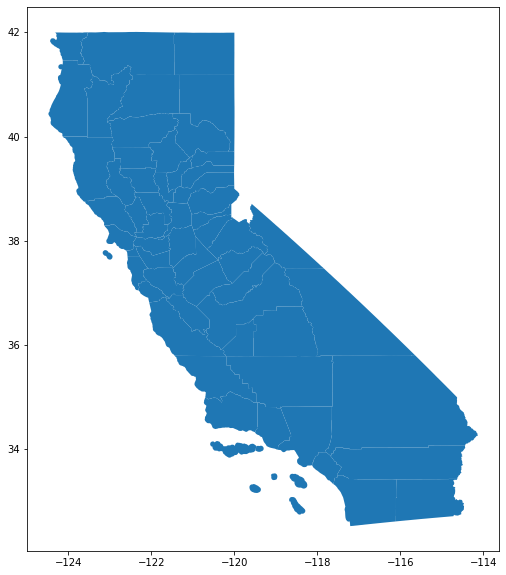

In [69]:
counties.plot()

<AxesSubplot:>

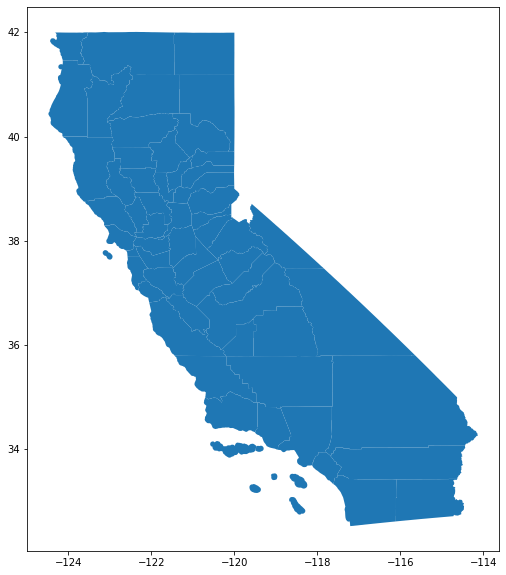

In [70]:
counties.plot()

<AxesSubplot:>

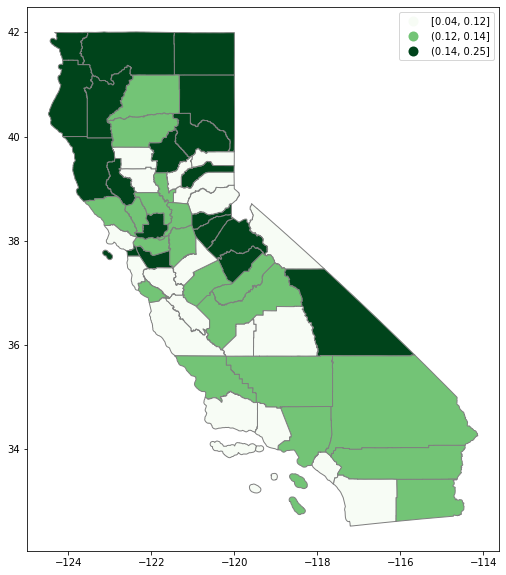

In [72]:
counties.plot(column='absentrate', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

<AxesSubplot:>

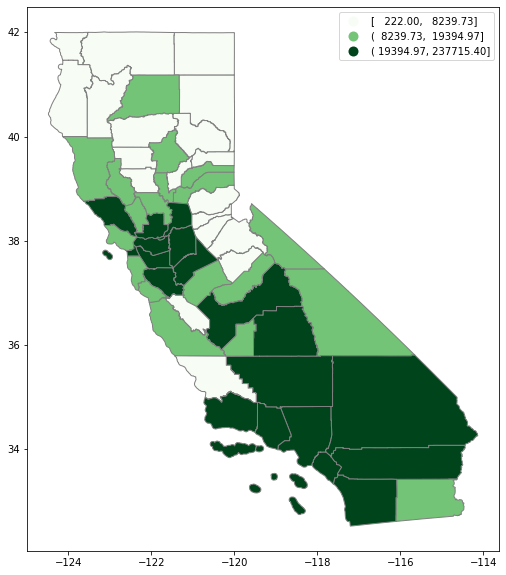

In [75]:
counties.plot(column='Dropout (Rate)', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

In [79]:
counties.to_parquet("SchoolCounty_Data.parquet")

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [78]:
gpd.read_parquet("schoolcounty_data.parquet")

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2
7,06013,"POLYGON ((-122.26764 37.90425, -122.26781 37.9...",06013,Contra Costa,CA,Contra Costa,226112.0,1792240.0,0.126162,29711.4,235645.6
8,06015,"POLYGON ((-124.31611 41.72839, -124.33061 41.7...",06015,Del Norte,CA,Del Norte,9230.0,45492.0,0.202893,2919.3,20509.9
9,06017,"POLYGON ((-121.11862 38.71712, -121.11876 38.7...",06017,El Dorado,CA,El Dorado,30818.0,269761.0,0.114242,7349.0,58730.7
10,06019,"POLYGON ((-119.70536 36.99979, -119.70502 37.0...",06019,Fresno,CA,Fresno,296474.0,2352385.0,0.126031,53242.8,269718.1
11,06021,"POLYGON ((-122.89094 39.64487, -122.89134 39.6...",06021,Glenn,CA,Glenn,7221.0,66047.0,0.109331,6634.6,28513.2
